📊 Contingency Table:
Necrosis   high  moderate  no
Cell Type                    
Epi           5         3   2
Epi/Mes       3         5   1
Mes           7         9   1

🧪 Chi-square test results:
Chi2 statistic = 2.33, p-value = 0.6762, degrees of freedom = 4
Expected counts under null hypothesis:
Necrosis       high  moderate        no
Cell Type                              
Epi        4.166667  4.722222  1.111111
Epi/Mes    3.750000  4.250000  1.000000
Mes        7.083333  8.027778  1.888889


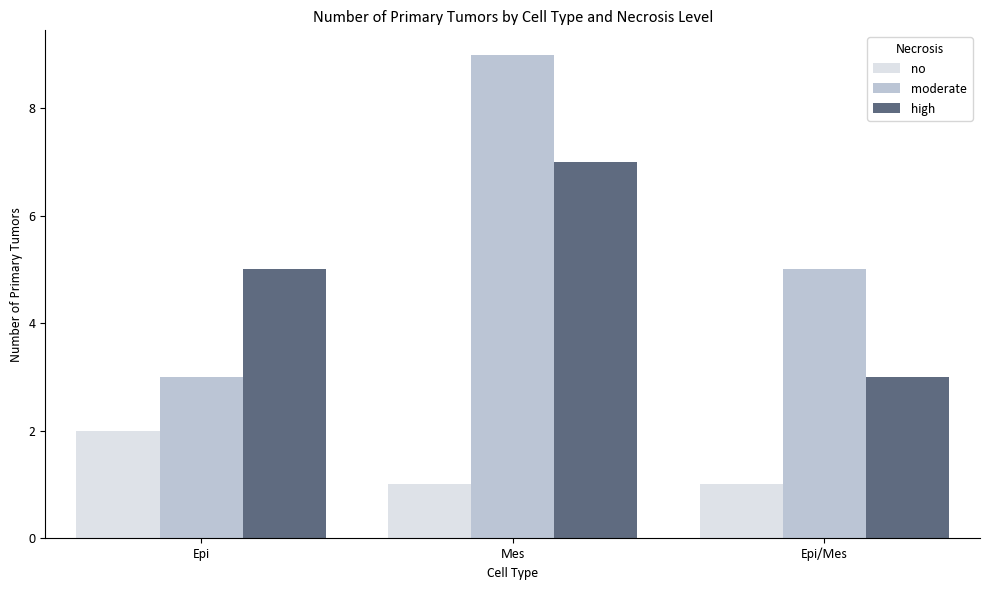

C:\Users\joakul\AppData\Local\Temp\ipykernel_22208\2790663593.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Cell Type', palette=colors)


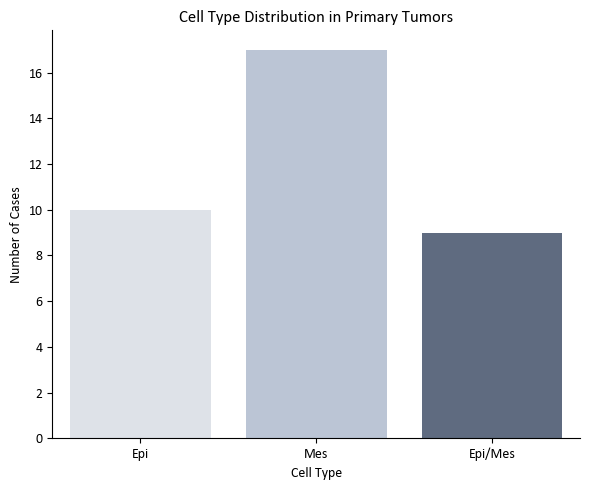

C:\Users\joakul\AppData\Local\Temp\ipykernel_22208\2790663593.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Necrosis', palette=colors)


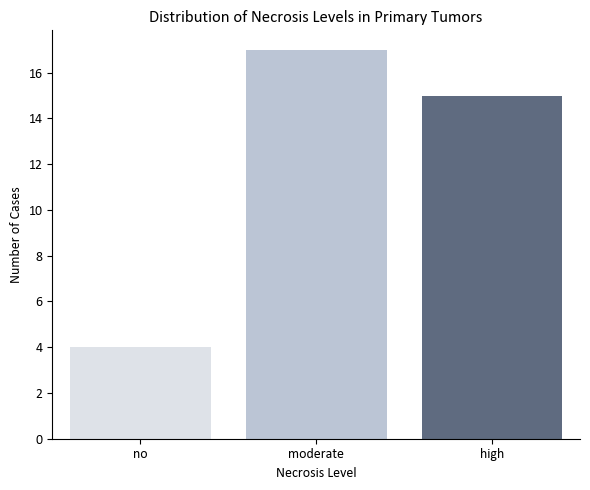

In [14]:
'''
Primary Tumor Cell Type and Necrosis Analysis with Chi-Square Test and Visualization

This script analyzes the relationship between cell types and necrosis levels in primary tumors.
It performs the following tasks:

1. Loads and cleans data from an Excel sheet.
2. Creates a contingency table of Cell Type vs Necrosis levels.
3. Conducts a chi-square test to evaluate the association between variables.
4. Visualizes the data with bar plots:
   - Number of primary tumors by cell type and necrosis level (grouped bar plot).
   - Distribution of cell types in primary tumors.
   - Distribution of necrosis levels in primary tumors.
5. Enhances plot aesthetics by removing top and right axes for cleaner visuals.

Dependencies:
- pandas
- seaborn
- matplotlib
- scipy

Input:
- Excel file: 'UTF-8Lista przerzutów_CTC_13.05.2025.xlsx', sheet 'Arkusz1'
- Required columns: 'Cell Type', 'Necrosis'

Output:
- Printed contingency table and chi-square test results.
- Three bar plots showing distributions and group comparisons.
'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Set font for the entire figure
plt.rcParams['font.family'] = 'Calibri'

# Load Excel data
df = pd.read_excel('UTF-8Lista przerzutów_CTC_13.05.2025.xlsx', sheet_name='Arkusz1')

# Data cleaning: select relevant columns, drop missing values, filter out 'no info'
df = df[['Cell Type', 'Necrosis']].dropna()
df = df[df['Necrosis'] != 'no info']

# Define color palette for plots
colors = ["#DCE1EA", "#B7C4D9", "#5A6A85"]

# Create contingency table of Cell Type vs Necrosis levels
contingency = pd.crosstab(df['Cell Type'], df['Necrosis'])
print("📊 Contingency Table:")
print(contingency)

# Perform Chi-square test to check independence between Cell Type and Necrosis
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\n🧪 Chi-square test results:")
print(f"Chi2 statistic = {chi2:.2f}, p-value = {p:.4f}, degrees of freedom = {dof}")
print("Expected counts under null hypothesis:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

# Plot 1: Count of tumors by Cell Type and Necrosis level (grouped bar plot)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Cell Type', hue='Necrosis', palette=colors)
plt.title('Number of Primary Tumors by Cell Type and Necrosis Level')
plt.xlabel('Cell Type')
plt.ylabel('Number of Primary Tumors')
plt.legend(title='Necrosis')
sns.despine(top=True, right=True)  # Remove top and right spines for cleaner look
plt.tight_layout()
#plt.savefig('Necrosis_cell type comparision_primary tutour_poster.png')
plt.show()

# Plot 2: Distribution of Cell Types in primary tumors
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Cell Type', palette=colors)
plt.title('Cell Type Distribution in Primary Tumors')
plt.xlabel('Cell Type')
plt.ylabel('Number of Cases')
sns.despine(top=True, right=True)
plt.tight_layout()
#plt.savefig('Cell type distribution in primary tumors_poster.png')
plt.show()

# Plot 3: Distribution of Necrosis levels in primary tumors
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Necrosis', palette=colors)
plt.title('Distribution of Necrosis Levels in Primary Tumors')
plt.xlabel('Necrosis Level')
plt.ylabel('Number of Cases')
sns.despine(top=True, right=True)
plt.tight_layout()
#plt.savefig('Distribution of necrosis levels in primary tumors_poster.png')
plt.show()
